# 2023 MLB Pitching Statistics
**Author**: [Jake Rood](https://github.com/jakerood)

**Date**: 09-22-2023

## IMPORT CSV DATASET

In [1]:
# First we need to import pandas
import pandas as pd

# Use pandas to read in the 2023 MLB Pitching Statistics CSV as a DataFrame
pitching_df = pd.read_csv(r"/Users/jakerood/Documents/NW_Missouri/fangraphs_pitching_2023.csv")

# Let's view the DataFrame. There are hundreds of rows, so just view the DataFrame's head
pitching_df.head()

,Name,Team,Season,Age,Throws,IP,G,GS,W,L,...,SIERA,Barrel%,HardHit%,CSW%,Stuff+,Location+,Pitching+,NameASCII,PlayerId,MLBAMID
0,Danny Mendick,NYM,2023,29,R,2.0,2,0,0,0,...,8.893318,0.133333,0.466667,0.052632,-5.500000,92.500000,135.000000,Danny Mendick,18889,664901
1,Tucker Barnhart,CHC,2023,32,R,4.0,4,0,0,0,...,5.782750,0.052632,0.578947,0.190476,-4.863636,84.045455,122.518182,Tucker Barnhart,10200,571466
2,Kody Clemens,PHI,2023,27,R,2.2,4,0,0,0,...,7.961034,0.000000,0.000000,0.219512,-82.500000,42.800000,122.100000,Kody Clemens,20572,665019
3,Shane Greene,CHC,2023,34,R,1.0,1,0,0,0,...,4.695002,0.000000,0.000000,0.222222,94.311111,120.377778,119.077778,Shane Greene,10756,572888
4,Ryan Pressly,HOU,2023,34,R,62.0,62,0,4,5,...,2.801370,0.083832,0.449102,0.316667,155.907403,102.593952,118.111783,Ryan Pressly,7005,519151


## CLEAN THE DATSET

In [2]:
# There's a lot of data in the file. We do not need all 38 columns.
# Let's clean up the data so it just shows player information and a few key pitching stats
# Keep name, team, age, throws, IP, K%, ERA, Stuff+, Location+, and Pitching+
pitching_df = pitching_df[['Name', 'Team', 'Age', 'Throws', 'IP', 'K%', 'ERA', 'Stuff+',
                           'Location+', 'Pitching+']]

In [3]:
# View the head of the cleaned up DataFrame to confirm only the columns we want are displayed
pitching_df.head()

,Name,Team,Age,Throws,IP,K%,ERA,Stuff+,Location+,Pitching+
0,Danny Mendick,NYM,29,R,2.0,0.000000,36.000017,-5.500000,92.500000,135.000000
1,Tucker Barnhart,CHC,32,R,4.0,0.000000,2.250000,-4.863636,84.045455,122.518182
2,Kody Clemens,PHI,27,R,2.2,0.066667,3.375002,-82.500000,42.800000,122.100000
3,Shane Greene,CHC,34,R,1.0,0.250000,0.000000,94.311111,120.377778,119.077778
4,Ryan Pressly,HOU,34,R,62.0,0.281746,3.774194,155.907403,102.593952,118.111783


In [4]:
# Many non-counting baseball statistics are typically displayed to 3 decimal places
# So let's set the display precision to 3 decimal places
pd.set_option("display.precision", 3)

In [5]:
# Sort the DataFrame by a pitcher's Stuff+, with the highest Stuff+ on top
pitching_df.sort_values(by=['Stuff+'], inplace=True, ascending=False)

In [6]:
# All players who have pitched in a MLB game this season are included in the dataset
# Make it so the DataFrame only includes players who have pitched at least 50 innings
new_df = pitching_df[pitching_df['IP'] >= 50]

In [7]:
# View the final cleaned-up DataFrame
new_df

,Name,Team,Age,Throws,IP,K%,ERA,Stuff+,Location+,Pitching+
4,Ryan Pressly,HOU,34,R,62.0,0.282,3.774,155.907,102.594,118.112
6,Emmanuel Clase,CLE,25,R,68.2,0.215,3.015,154.779,104.815,116.748
15,Félix Bautista,BAL,28,R,61.0,0.464,1.475,139.584,94.254,113.962
116,Bryan Abreu,HOU,26,R,67.1,0.338,1.871,139.249,94.894,105.235
207,Jake Diekman,- - -,36,L,52.2,0.261,3.589,138.180,93.203,102.694
...,...,...,...,...,...,...,...,...,...,...
593,Martín Pérez,TEX,32,L,136.1,0.150,4.489,74.235,103.779,94.967
275,Cody Bradford,TEX,25,L,50.1,0.220,4.649,72.338,105.509,101.110
636,Kyle Freeland,COL,30,L,155.2,0.139,5.030,69.917,102.877,93.784
758,Jared Shuster,ATL,24,L,52.2,0.130,5.639,64.573,96.040,87.278


## DESCRIPTIVE STATISTICS

In [8]:
# Now calculate some basic descriptive stats of the numeric columns for players
# who pitched at least 50 innings
new_df.describe()

,Age,IP,K%,ERA,Stuff+,Location+,Pitching+
count,332.000,332.000,332.000,332.000,332.000,332.000,332.000
mean,28.982,94.112,0.235,4.128,101.042,100.398,100.630
std,3.728,42.302,0.054,1.206,14.389,3.646,5.125
min,20.000,50.000,0.113,1.073,58.810,88.805,87.278
25%,26.000,60.750,0.196,3.291,91.769,98.156,97.081
50%,29.000,78.000,0.235,4.039,100.845,100.458,100.562
75%,32.000,126.700,0.265,4.857,108.850,102.794,103.948
max,43.000,207.000,0.464,7.652,155.907,114.004,118.112


## HISTOGRAM

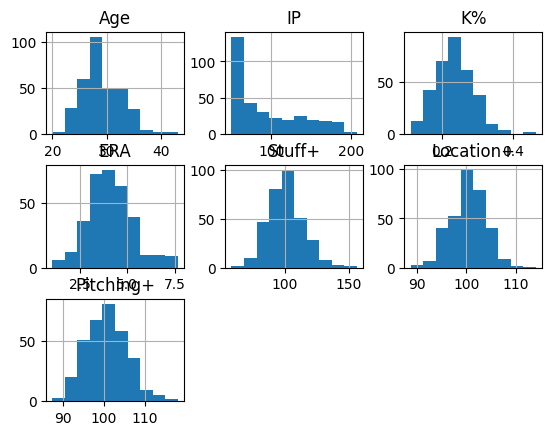

In [9]:
# Create histograms for the numeric columns for players who pitched at least 50 innings
# First enable matplotlib
%matplotlib inline

# Now use the hist function to create the histograms
histogram = new_df.hist()

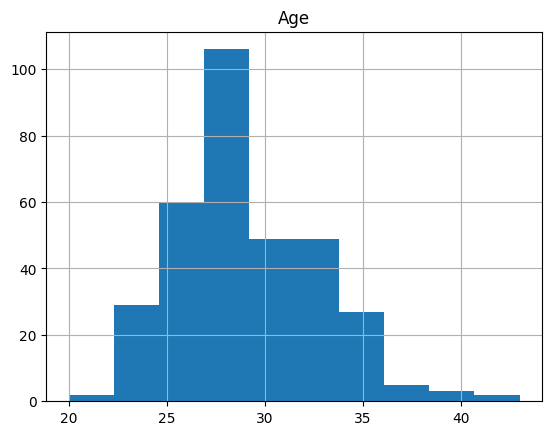

In [10]:
# Let's view each histogram individually
hist_age = new_df.hist(['Age'])

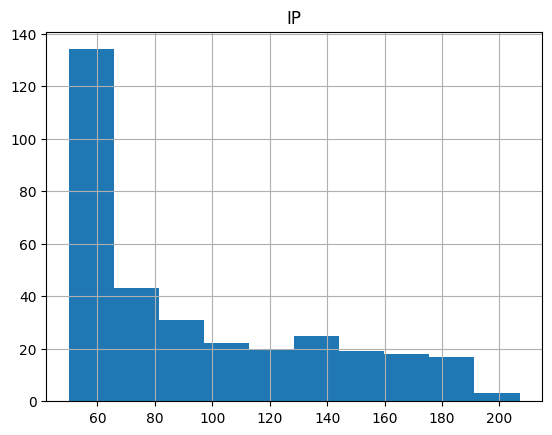

In [11]:
hist_ip = new_df.hist(['IP'])

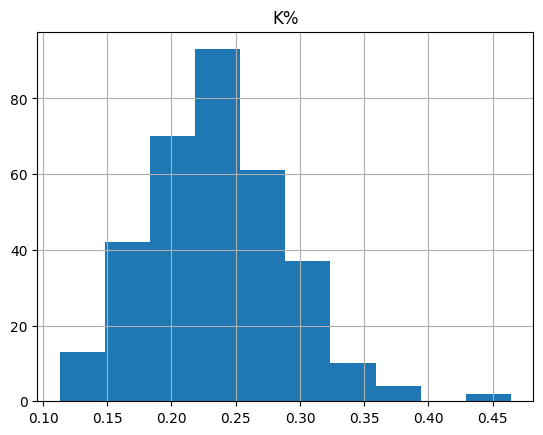

In [12]:
hist_k = new_df.hist(['K%'])

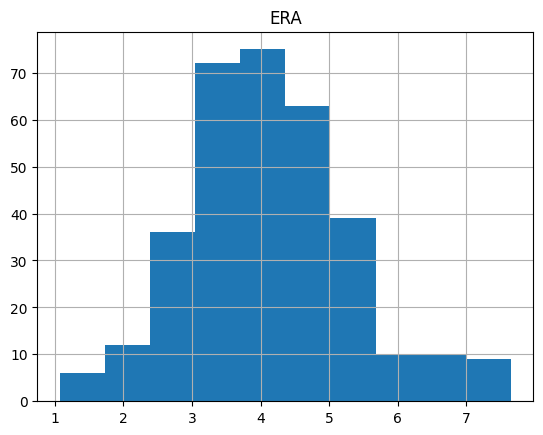

In [13]:
hist_era = new_df.hist(['ERA'])

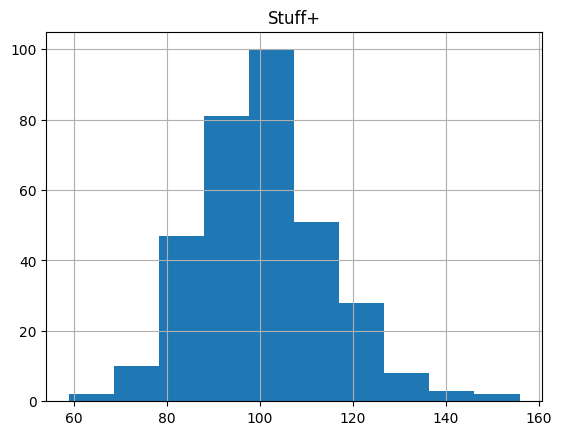

In [14]:
hist_stuff = new_df.hist(['Stuff+'])

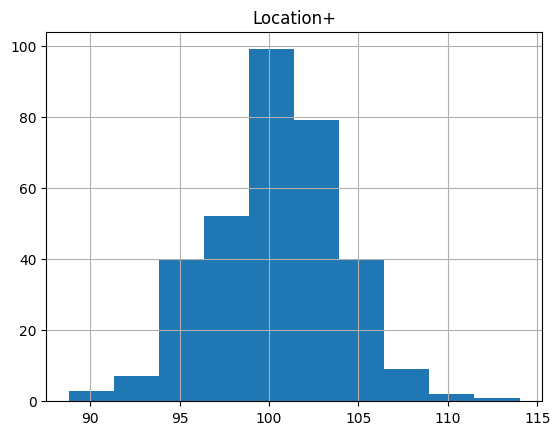

In [15]:
hist_location = new_df.hist(['Location+'])

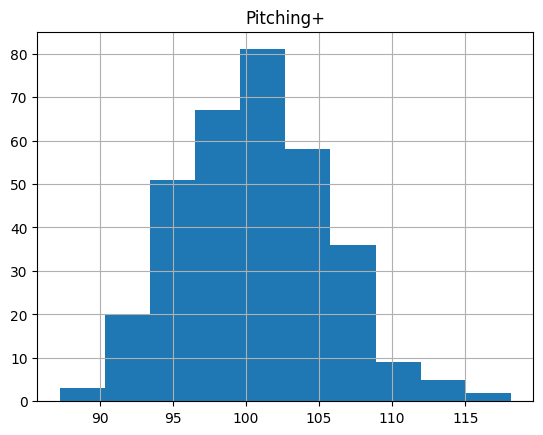

In [16]:
hist_pitching = new_df.hist(['Pitching+'])

## BONUS - SCATTER PLOT

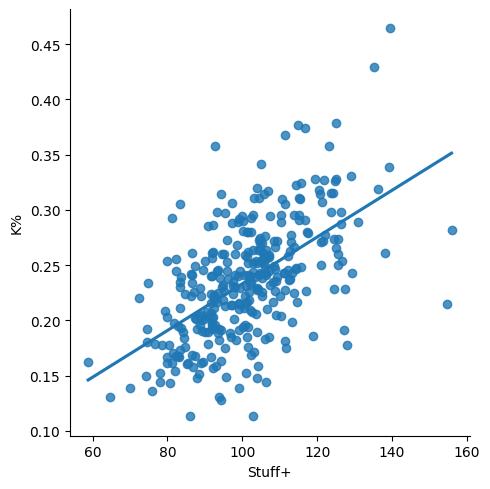

In [17]:
# For fun, let's create a scatter plot to view the relationship of two statistics to one another
# Show the relationship between Stuff+ and K% for players who pitched at least 50 innings
import seaborn as sns
stuff_k_scatter = sns.lmplot(x='Stuff+', y='K%', data=new_df, ci=None)